<a href="https://colab.research.google.com/github/Marcotmr/Google-Stock-Price-Forecasting-with-Prophet/blob/main/Google_Stock_Close_with_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install prophet

In [2]:
pip install pystan cython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.6 MB/s eta 0:00:00


In [3]:
%matplotlib inline
from prophet import Prophet
import numpy as np
import pandas as pd
from datetime import date, timedelta
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
google_stock = pd.read_csv('/content/Download Data - STOCK_US_XNAS_GOOG (2).csv')

In [105]:
google_stock

,Date,Close
0,09/25/2023,132.17
1,09/22/2023,131.25
2,09/21/2023,131.36
3,09/20/2023,134.59
4,09/19/2023,138.83
...,...,...
220,11/07/2022,88.65
221,11/04/2022,86.70
222,11/03/2022,83.49
223,11/02/2022,87.07


In [6]:
#delete unecessary columns
google_stock = google_stock.drop(google_stock.columns[[1,2,3,5]], axis=1)

In [7]:
#Transforming to stationary data
google_stock['y'] = (google_stock['Close'])
google_stock['ds'] = google_stock['Date']
google_stock = google_stock.drop(google_stock.columns[[0,1]], axis=1)

In [8]:
google_stock

,y,ds
0,132.17,09/25/2023
1,131.25,09/22/2023
2,131.36,09/21/2023
3,134.59,09/20/2023
4,138.83,09/19/2023
...,...,...
220,88.65,11/07/2022
221,86.70,11/04/2022
222,83.49,11/03/2022
223,87.07,11/02/2022


In [9]:
google_stock.iloc[:,[1,0]]

,ds,y
0,09/25/2023,132.17
1,09/22/2023,131.25
2,09/21/2023,131.36
3,09/20/2023,134.59
4,09/19/2023,138.83
...,...,...
220,11/07/2022,88.65
221,11/04/2022,86.70
222,11/03/2022,83.49
223,11/02/2022,87.07


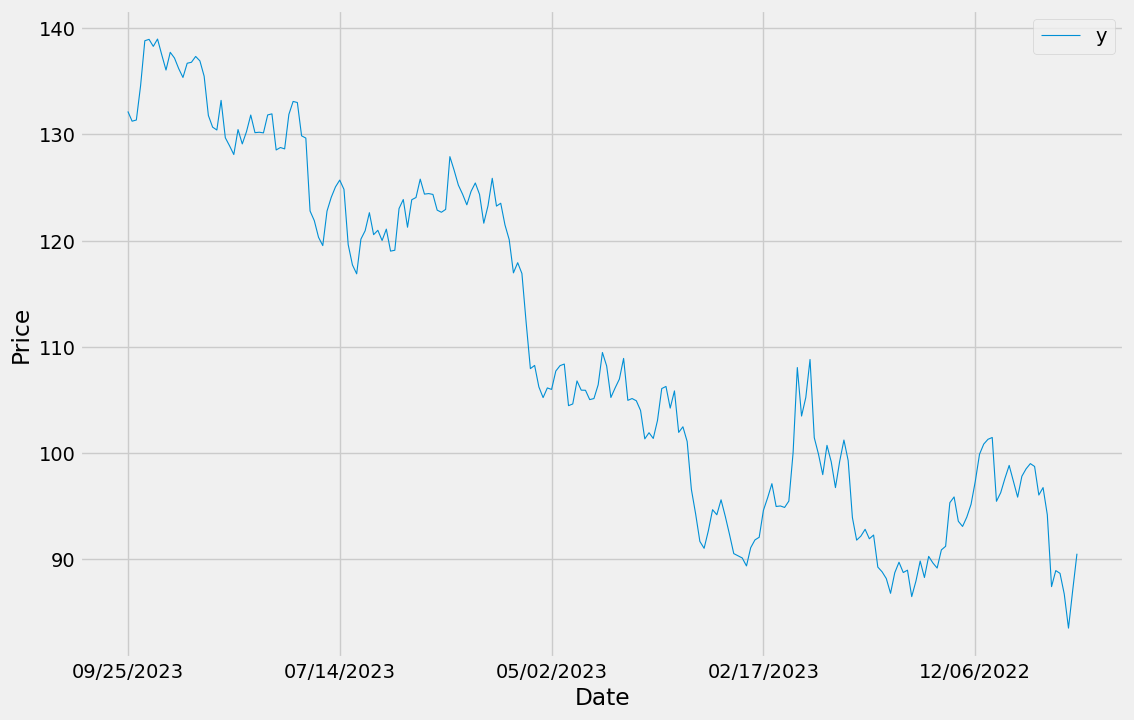

In [10]:
ax = google_stock.set_index('ds').plot(figsize=(12, 8), linewidth =0.8)
ax.set_ylabel('Price')
ax.set_xlabel('Date')
plt.show()

In [11]:
#set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)

In [12]:
my_model.fit(google_stock)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpujp5c1u8/xsccf14t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpujp5c1u8/ors18oei.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29868', 'data', 'file=/tmp/tmpujp5c1u8/xsccf14t.json', 'init=/tmp/tmpujp5c1u8/ors18oei.json', 'output', 'file=/tmp/tmpujp5c1u8/prophet_modeljlu165m0/prophet_model-20230926083051.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:30:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:30:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [13]:
future_dates = my_model.make_future_dataframe(periods=6, freq='m')
future_dates.tail()

,ds
226,2023-10-31
227,2023-11-30
228,2023-12-31
229,2024-01-31
230,2024-02-29


In [14]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
226,2023-10-31,142.635432,134.083111,151.485973
227,2023-11-30,147.294504,137.799819,156.423155
228,2023-12-31,150.737414,140.355672,160.663778
229,2024-01-31,156.421813,143.864102,167.695436
230,2024-02-29,161.226556,147.666235,174.630260


<Figure size 3000x1800 with 0 Axes>

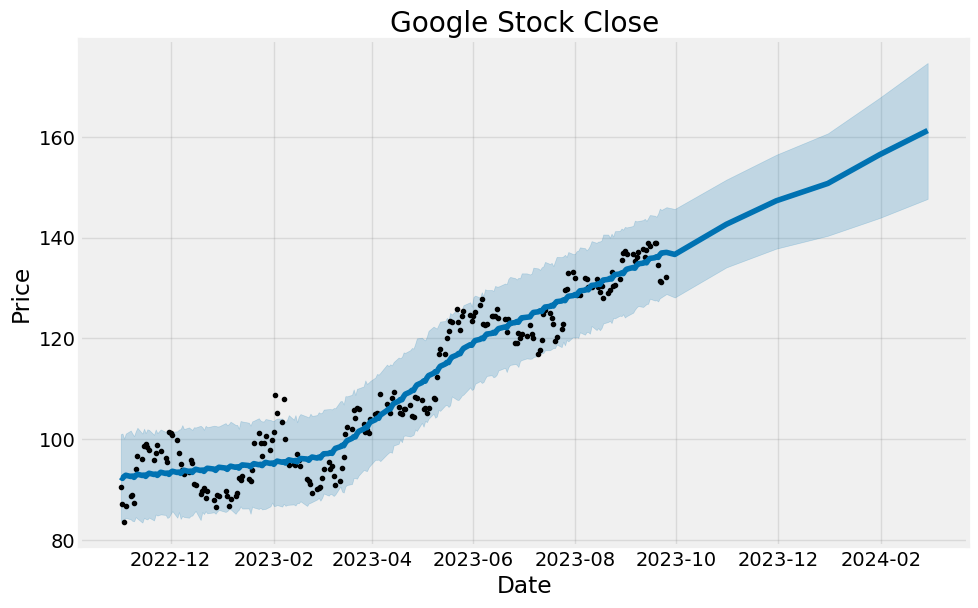

In [15]:
#Plot forecast
plt.figure(figsize=(10, 6), dpi=300)

my_model.plot(forecast, uncertainty=True)

plt.title('Google Stock Close')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

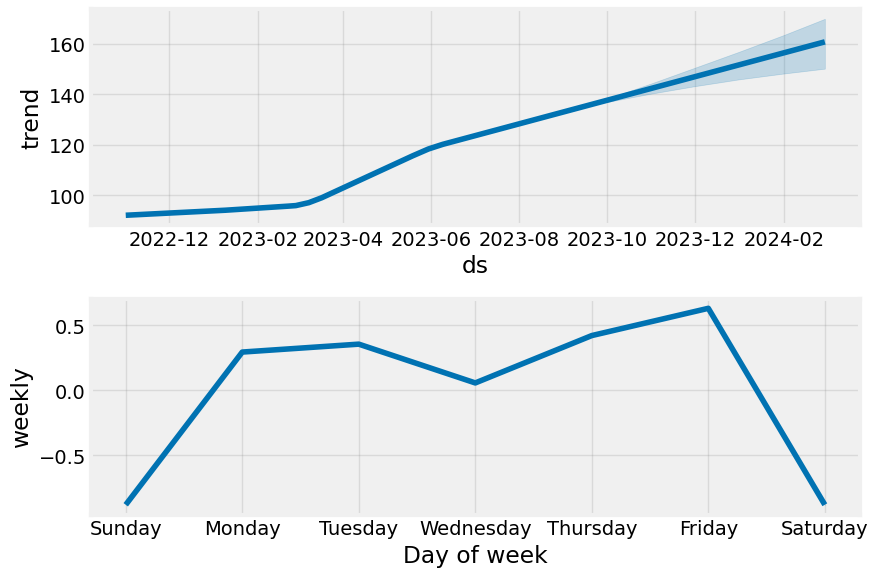

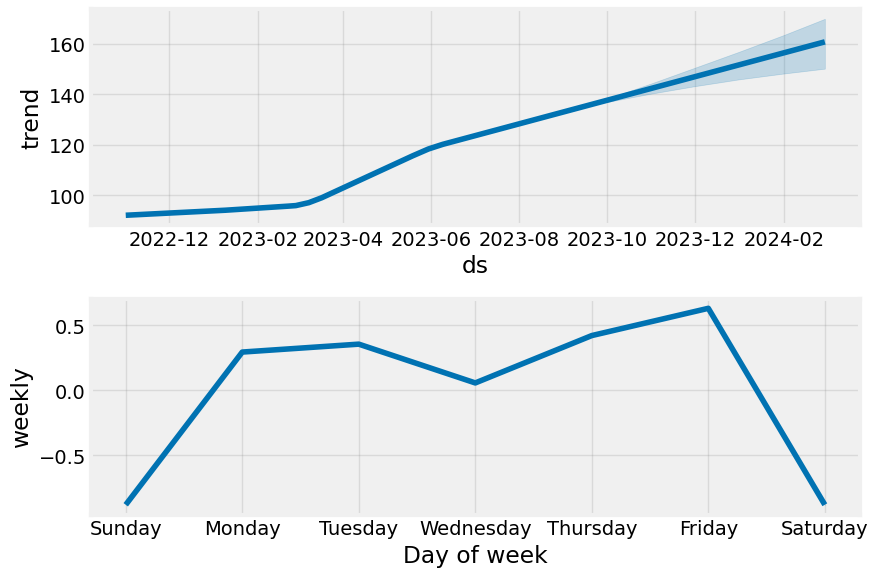

In [16]:
my_model.plot_components(forecast)

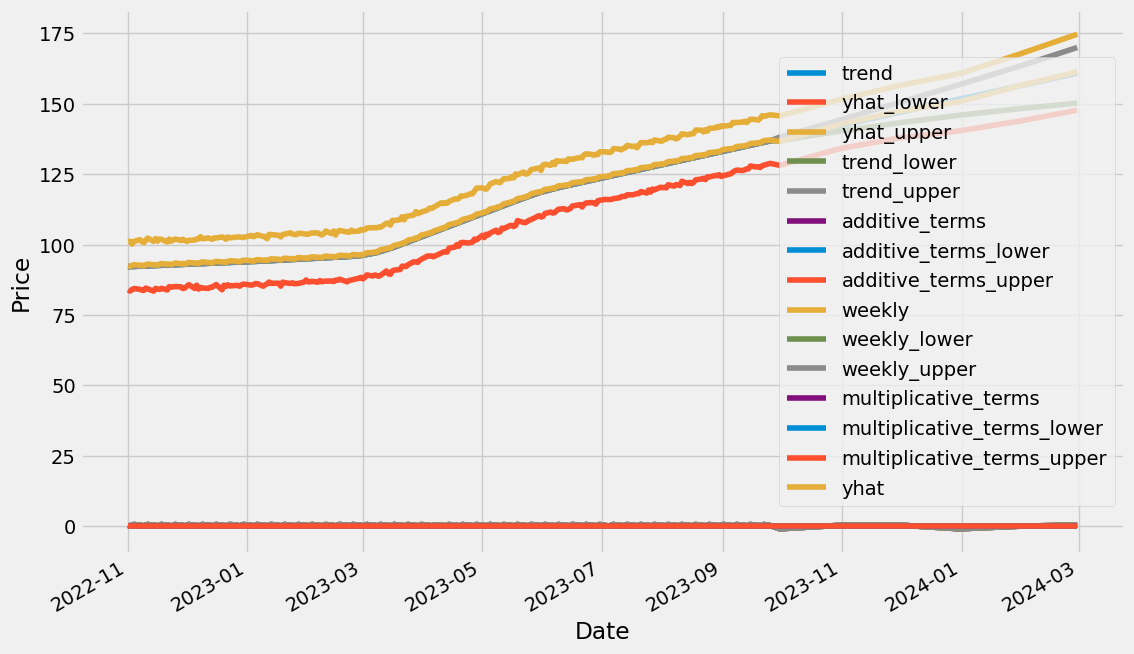

In [17]:
ax = forecast.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Price')
ax.set_xlabel('Date')
plt.show()

Text(0.5, 1.0, 'Google Stock Closing Price Forecast')

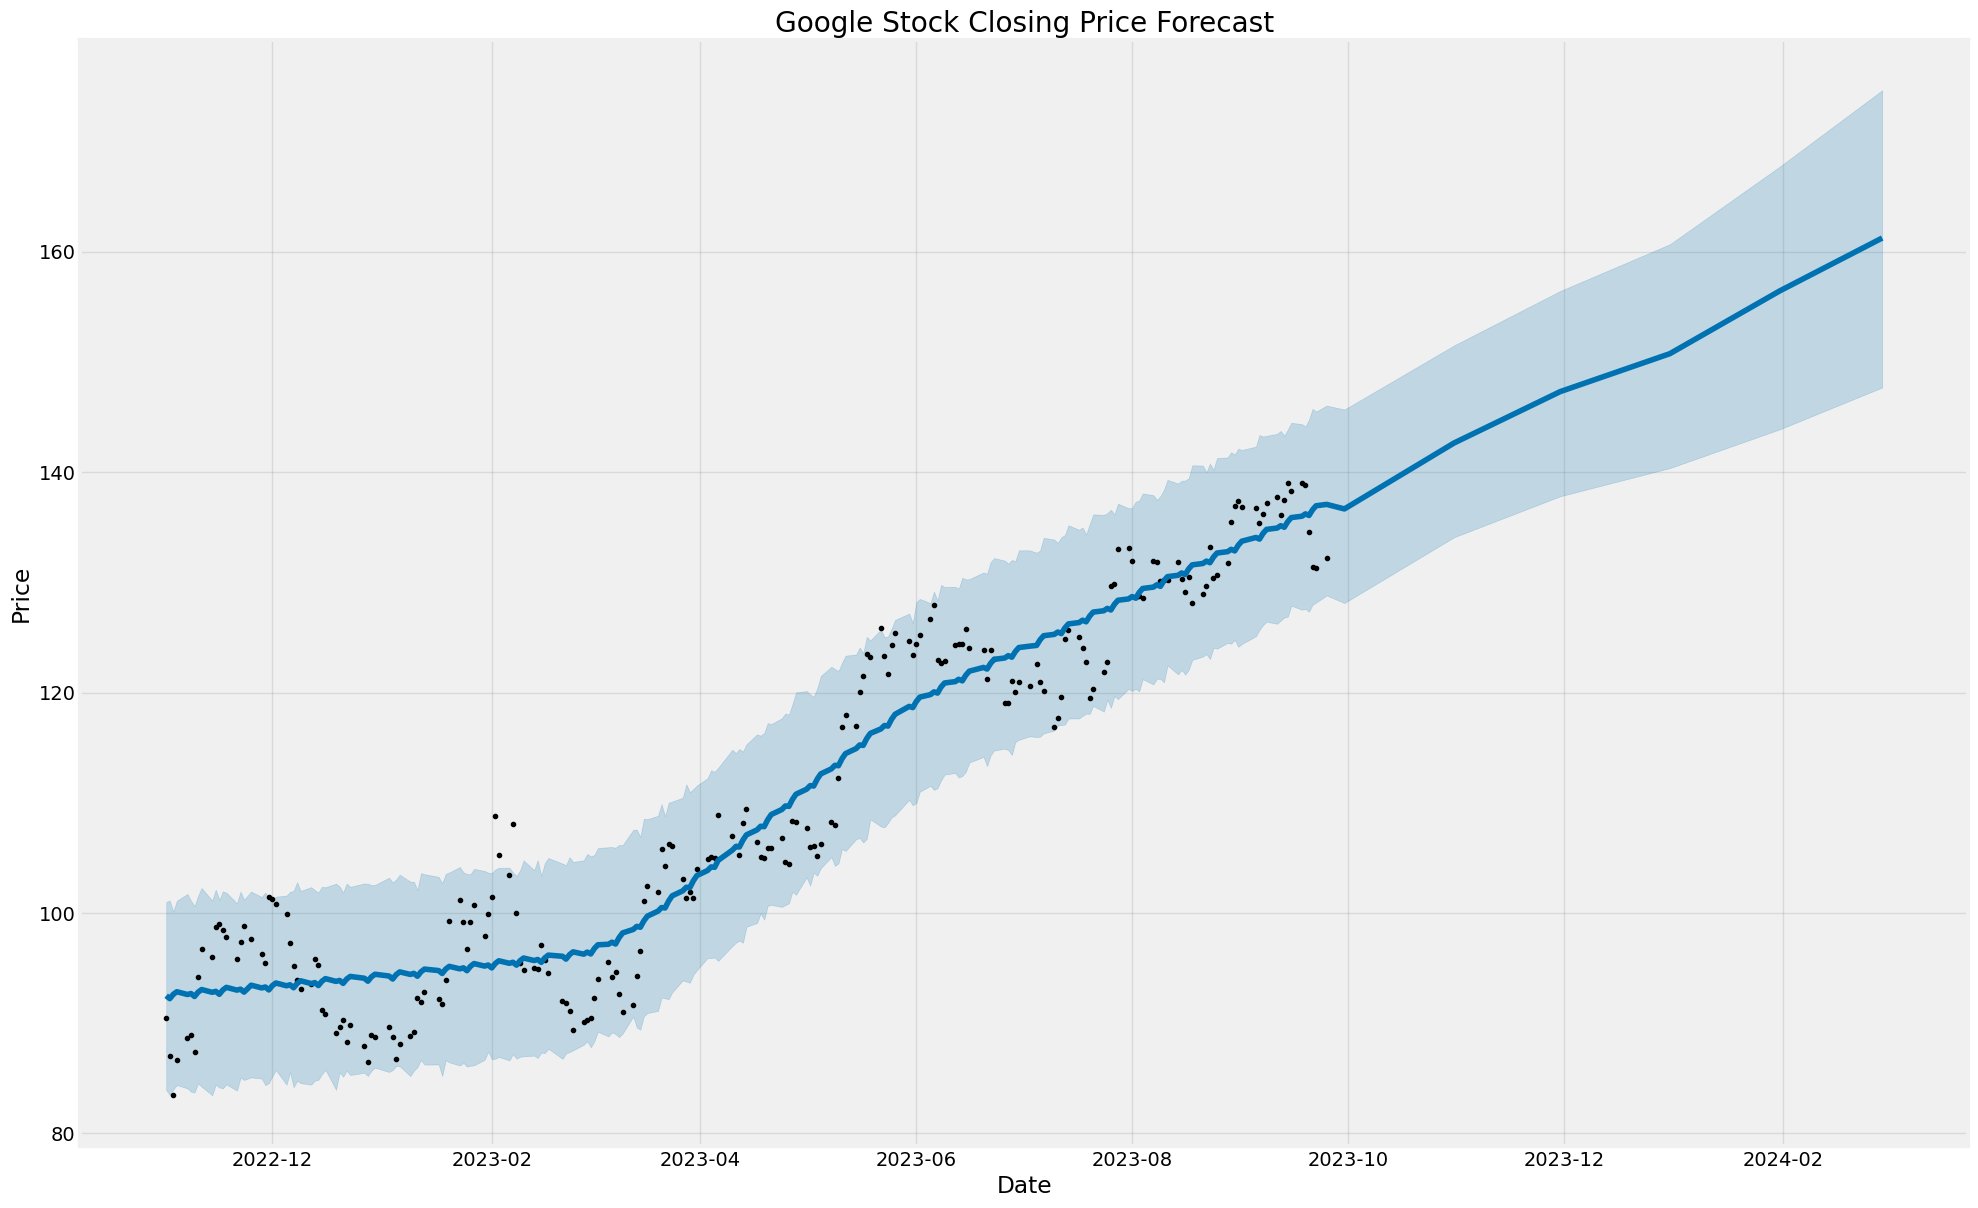

In [19]:
from prophet.plot import plot

plot(my_model, forecast, figsize=(20, 12), uncertainty=True, xlabel = "Date", ylabel="Price")
plt.title('Google Stock Closing Price Forecast')